In [2]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
test_df=pd.read_csv('/Users/riina//Downloads/P7/application_test.csv')
train_df=pd.read_csv('/Users/riina//Downloads/P7/application_train.csv')

In [4]:
train_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
plt.style.use("seaborn-whitegrid")
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.impute import SimpleImputer
import plotly.express as px

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
train_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
train_df.loc[train_df['DAYS_EMPLOYED']>0,'DAYS_EMPLOYED'] =train_df['DAYS_EMPLOYED'].median()
train_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

<AxesSubplot:xlabel='TARGET', ylabel='count'>

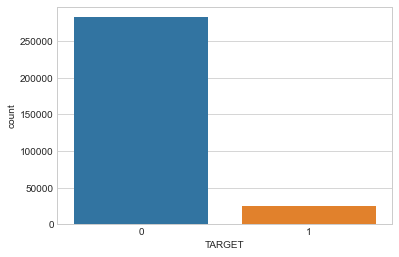

In [9]:
sns.countplot(x=train_df['TARGET'])

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


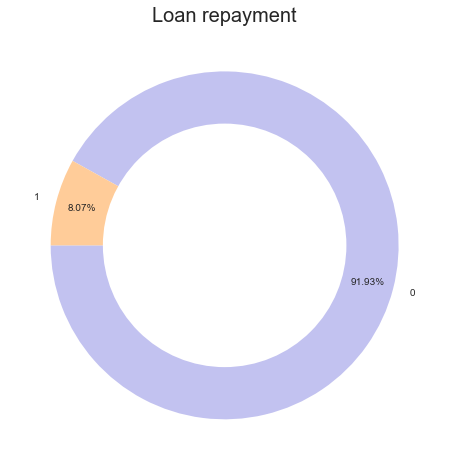

In [11]:
vals = train_df['TARGET'].value_counts().values
inds = train_df['TARGET'].value_counts().index

plt.figure(figsize = (16, 8))
plt.pie(x=vals, autopct="%.2f%%", labels = inds, colors = ['#c2c2f0','#ffcc99'], pctdistance = 0.85, startangle = 180)
plt.title('Loan repayment', fontdict = {'fontsize': 20})

centre_circle = plt.Circle((0,0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [12]:
def missing_values(df):
    n_miss_val = df.isnull().sum()
    n_miss_per = 100 * df.isnull().sum() / len(df)
    miss_tbl = pd.concat([n_miss_val,n_miss_per],axis=1).sort_values(1,ascending=False).round(1)
    miss_tbl = miss_tbl[miss_tbl[1] !=0]
    
    miss_tbl = miss_tbl.rename(columns ={0: 'Missing Values',1:'%(Percentage) Missing Values'})
    print("{} columns that have missing values.".format(miss_tbl.shape[0]))
    
    return miss_tbl

In [13]:
missing_values_table = missing_values(train_df)
missing_values_table.head(60)

64 columns that have missing values.


,Missing Values,%(Percentage) Missing Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4


In [14]:
def categorical_features(df):
    categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
    types=df[categorical_cols].dtypes
    uniques = df[categorical_cols].nunique()
    categorical_tbl = pd.concat([uniques,types],axis=1).sort_values(0,ascending=False).rename(columns = {0:'Unique Values',1:'Data Types'})
    print("The dataset contains {} categorical values".format(df[categorical_cols].shape[1]))
    
    return categorical_tbl

In [15]:
categorical_features(train_df)

The dataset contains 16 categorical values


,Unique Values,Data Types
ORGANIZATION_TYPE,58,object
OCCUPATION_TYPE,18,object
NAME_INCOME_TYPE,8,object
NAME_TYPE_SUITE,7,object
WEEKDAY_APPR_PROCESS_START,7,object
WALLSMATERIAL_MODE,7,object
NAME_FAMILY_STATUS,6,object
NAME_HOUSING_TYPE,6,object
NAME_EDUCATION_TYPE,5,object
FONDKAPREMONT_MODE,4,object


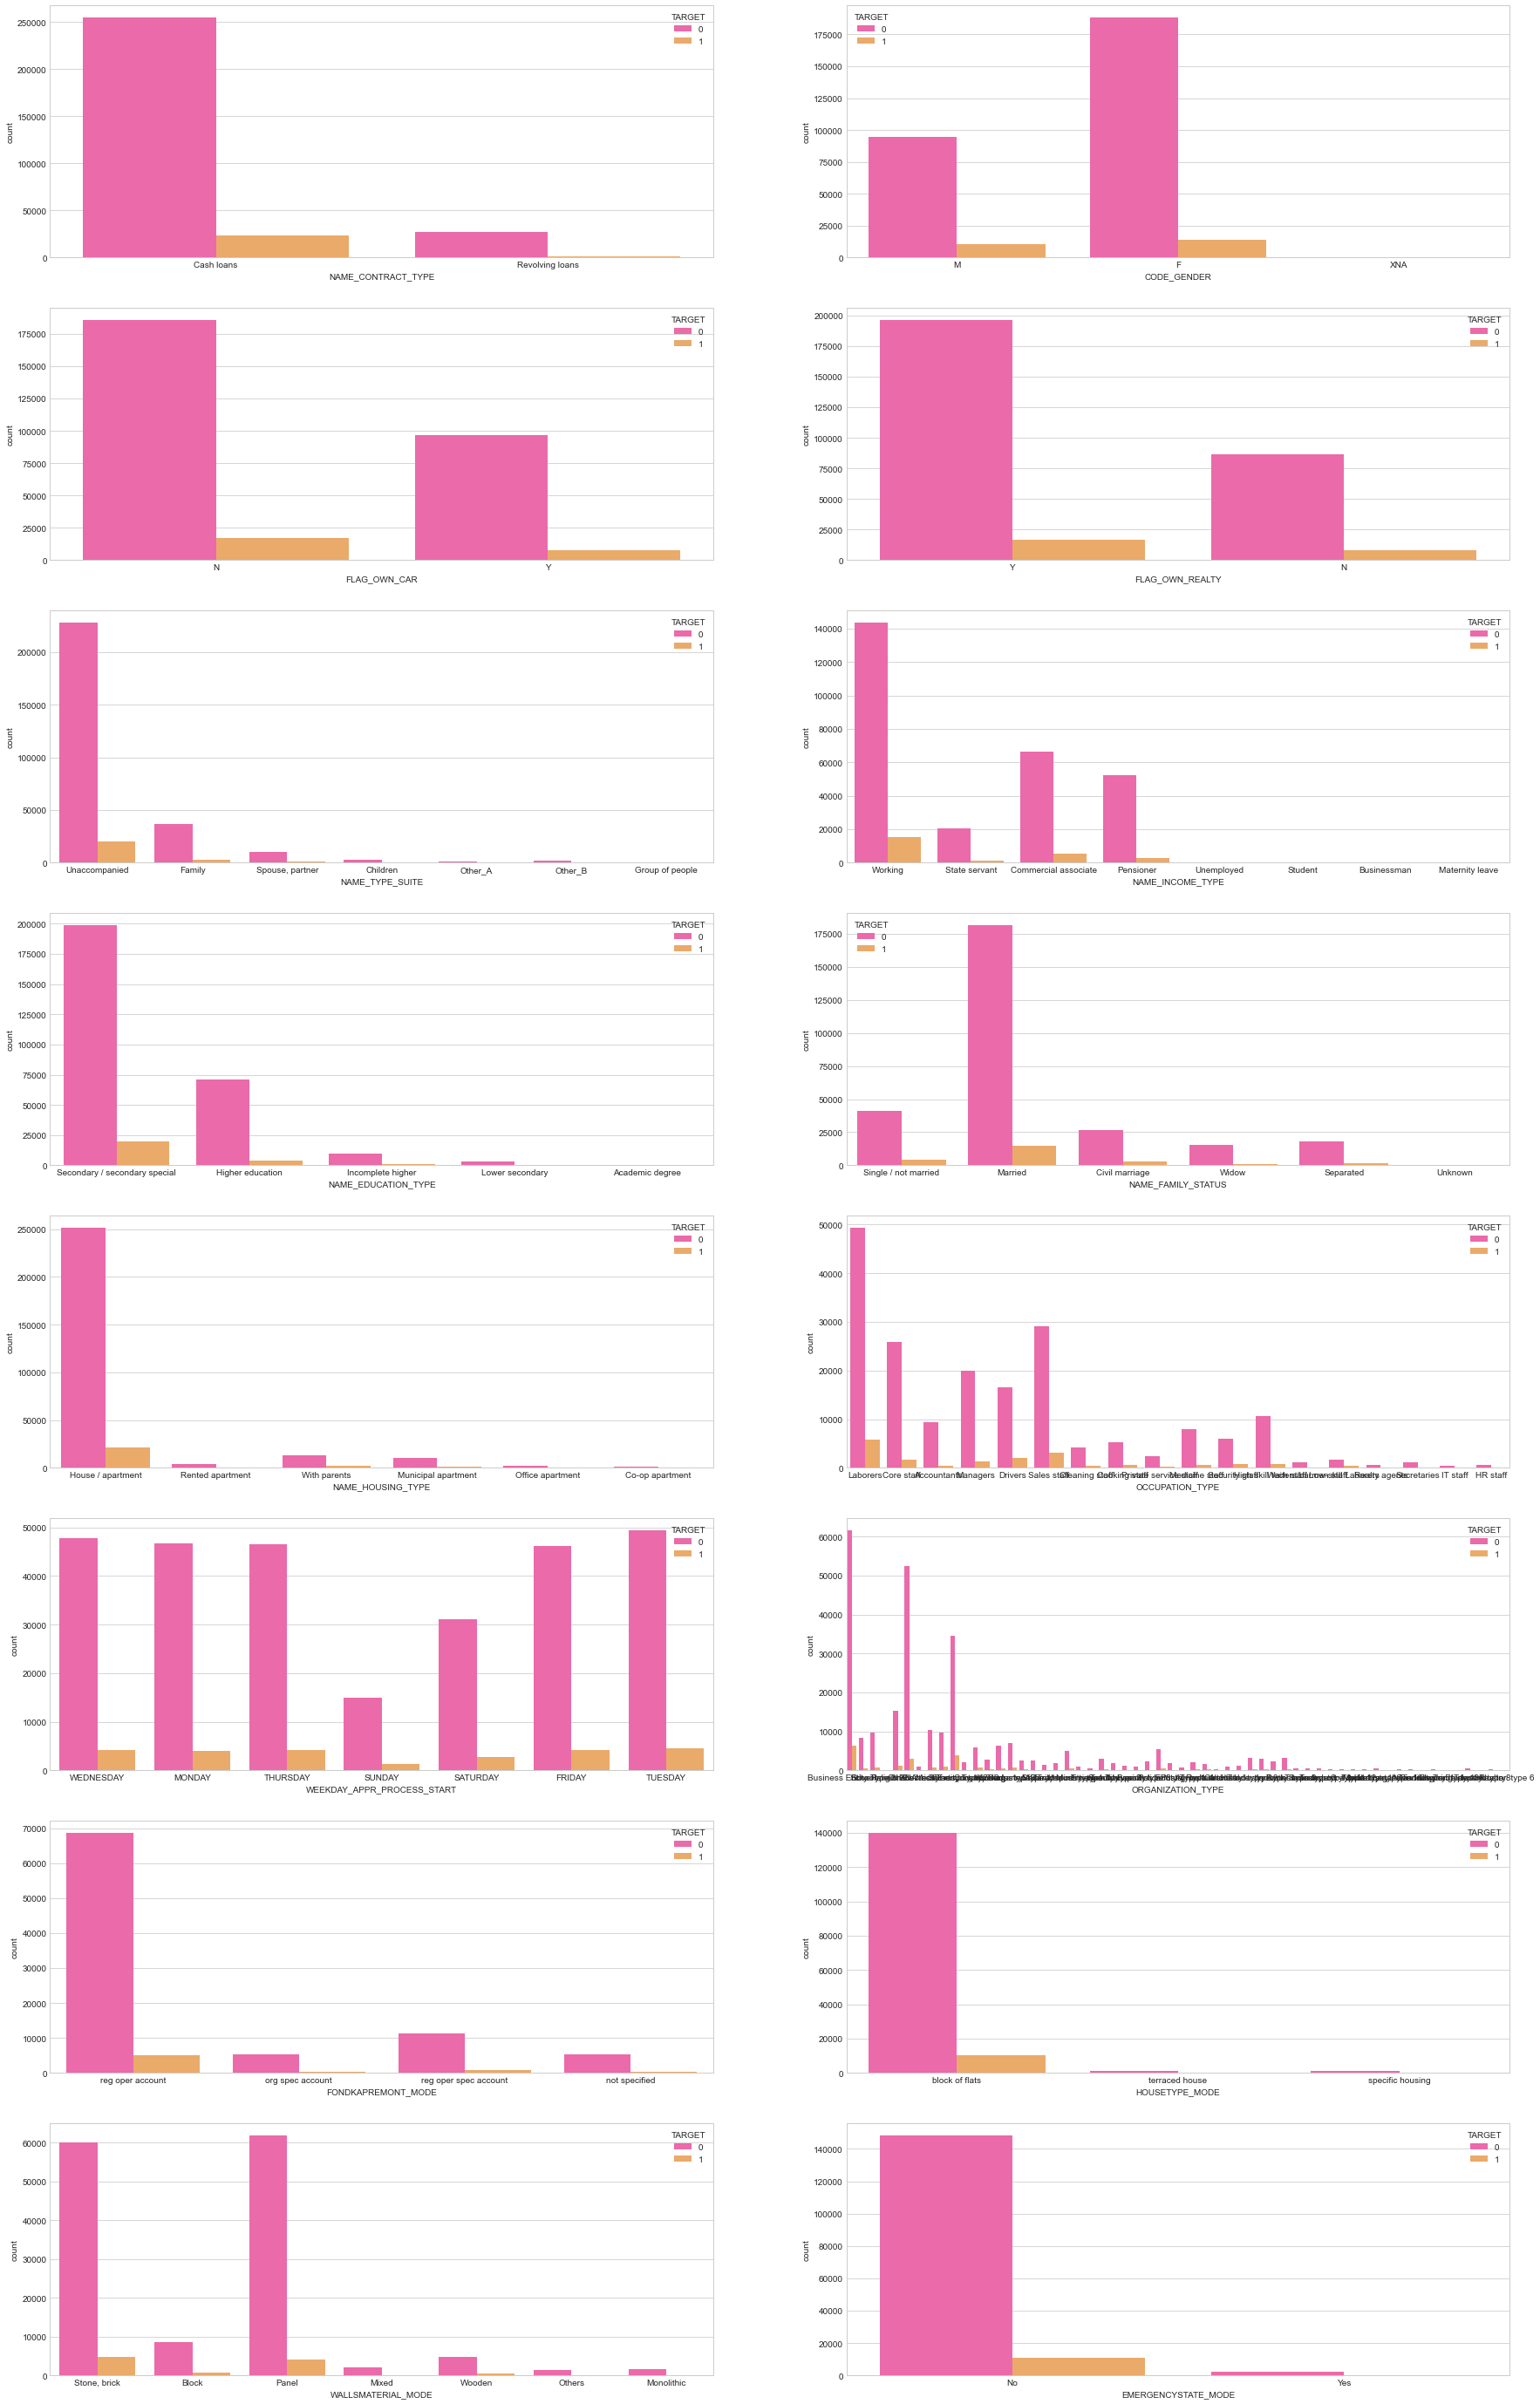

In [16]:
categorical_cols = train_df.select_dtypes(include=["object"]).columns.tolist()
fig , axs = plt.subplots(ncols=2,nrows=8,figsize=(30,50))
index=0
axs = axs.flatten()
for cols in categorical_cols:
        g = sns.countplot(x=cols,hue='TARGET',data=train_df,ax=axs[index],palette="spring")
        index +=1

In [17]:
def numerical_features(df):
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
    numerical_tbl = pd.DataFrame(train_df[numerical_cols].dtypes).rename(columns = {0:'Data Types'})
    print("The dataset contains {} numerical values.(included target value)".format(df[numerical_cols].shape[1]))
    
    return numerical_tbl

In [18]:
numerical_features(train_df)

The dataset contains 106 numerical values.(included target value)


,Data Types
SK_ID_CURR,int64
TARGET,int64
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
AMT_CREDIT,float64
...,...
AMT_REQ_CREDIT_BUREAU_DAY,float64
AMT_REQ_CREDIT_BUREAU_WEEK,float64
AMT_REQ_CREDIT_BUREAU_MON,float64
AMT_REQ_CREDIT_BUREAU_QRT,float64


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_cols = train_df.select_dtypes(include=["object"])
for col in categorical_cols:
    if len(list(categorical_cols[col].unique())) <=2:
            le.fit(train_df[col])
            le.fit(test_df[col])
            train_df[col] = le.transform(train_df[col])
            test_df[col] = le.transform(test_df[col])

In [20]:
train_df= pd.get_dummies(train_df)
test_df= pd.get_dummies(test_df)

print('Train data : ', train_df.shape)
print('Test data : ',test_df.shape)

Train data :  (307511, 243)
Test data :  (48744, 239)


In [21]:
corrs = train_df.corr()['TARGET'].sort_values(ascending=False)
corr_top_df=pd.DataFrame(corrs.head(20))
corr_top_df

,TARGET
TARGET,1.000000
DAYS_BIRTH,0.078239
REGION_RATING_CLIENT_W_CITY,0.060893
DAYS_EMPLOYED,0.058983
REGION_RATING_CLIENT,0.058899
NAME_INCOME_TYPE_Working,0.057481
DAYS_LAST_PHONE_CHANGE,0.055218
CODE_GENDER_M,0.054713
DAYS_ID_PUBLISH,0.051457
REG_CITY_NOT_WORK_CITY,0.050994


In [22]:
corrs = train_df.corr()['TARGET'].sort_values(ascending=False)
corr_top_df=pd.DataFrame(corrs.tail(20))
corr_top_df

,TARGET
LIVINGAREA_AVG,-0.032997
WALLSMATERIAL_MODE_Panel,-0.033119
FLOORSMIN_MEDI,-0.033394
FLOORSMIN_AVG,-0.033614
ELEVATORS_MEDI,-0.033863
ELEVATORS_AVG,-0.034199
REGION_POPULATION_RELATIVE,-0.037227
AMT_GOODS_PRICE,-0.039645
HOUSETYPE_MODE_block of flats,-0.040594
EMERGENCYSTATE_MODE_No,-0.042201


In [23]:
corr_matrx = pd.DataFrame(train_df).corr()
corr_df = corr_matrx.where(np.triu(np.ones(corr_matrx.shape),k=1).astype(np.bool))
corr_df =corr_df.unstack().reset_index()
corr_df.columns = ['Feature_1','Feature_2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Correlation'] = round(corr_df['Correlation'],3)
corr_df['Correlation'] = abs(corr_df['Correlation'])
mtrx = corr_df.sort_values(by = 'Correlation', ascending = False)
mx_corr = mtrx[mtrx['Correlation'] > 0.75]
print('{} highly correlated features were found.'.format(mx_corr.shape[0]))
mx_corr.sample(10)

124 highly correlated features were found.


,Feature_1,Feature_2,Correlation
17540,LANDAREA_MEDI,LANDAREA_AVG,0.992
18028,LIVINGAREA_MEDI,LIVINGAREA_AVG,0.996
18746,TOTALAREA_MODE,APARTMENTS_AVG,0.893
17554,LANDAREA_MEDI,LANDAREA_MODE,0.981
18031,LIVINGAREA_MEDI,APARTMENTS_MODE,0.894
14620,LIVINGAREA_MODE,ELEVATORS_AVG,0.839
7563,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.826
1951,AMT_ANNUITY,AMT_CREDIT,0.770
13894,FLOORSMIN_MODE,FLOORSMIN_AVG,0.986
16583,ELEVATORS_MEDI,LIVINGAPARTMENTS_MODE,0.799


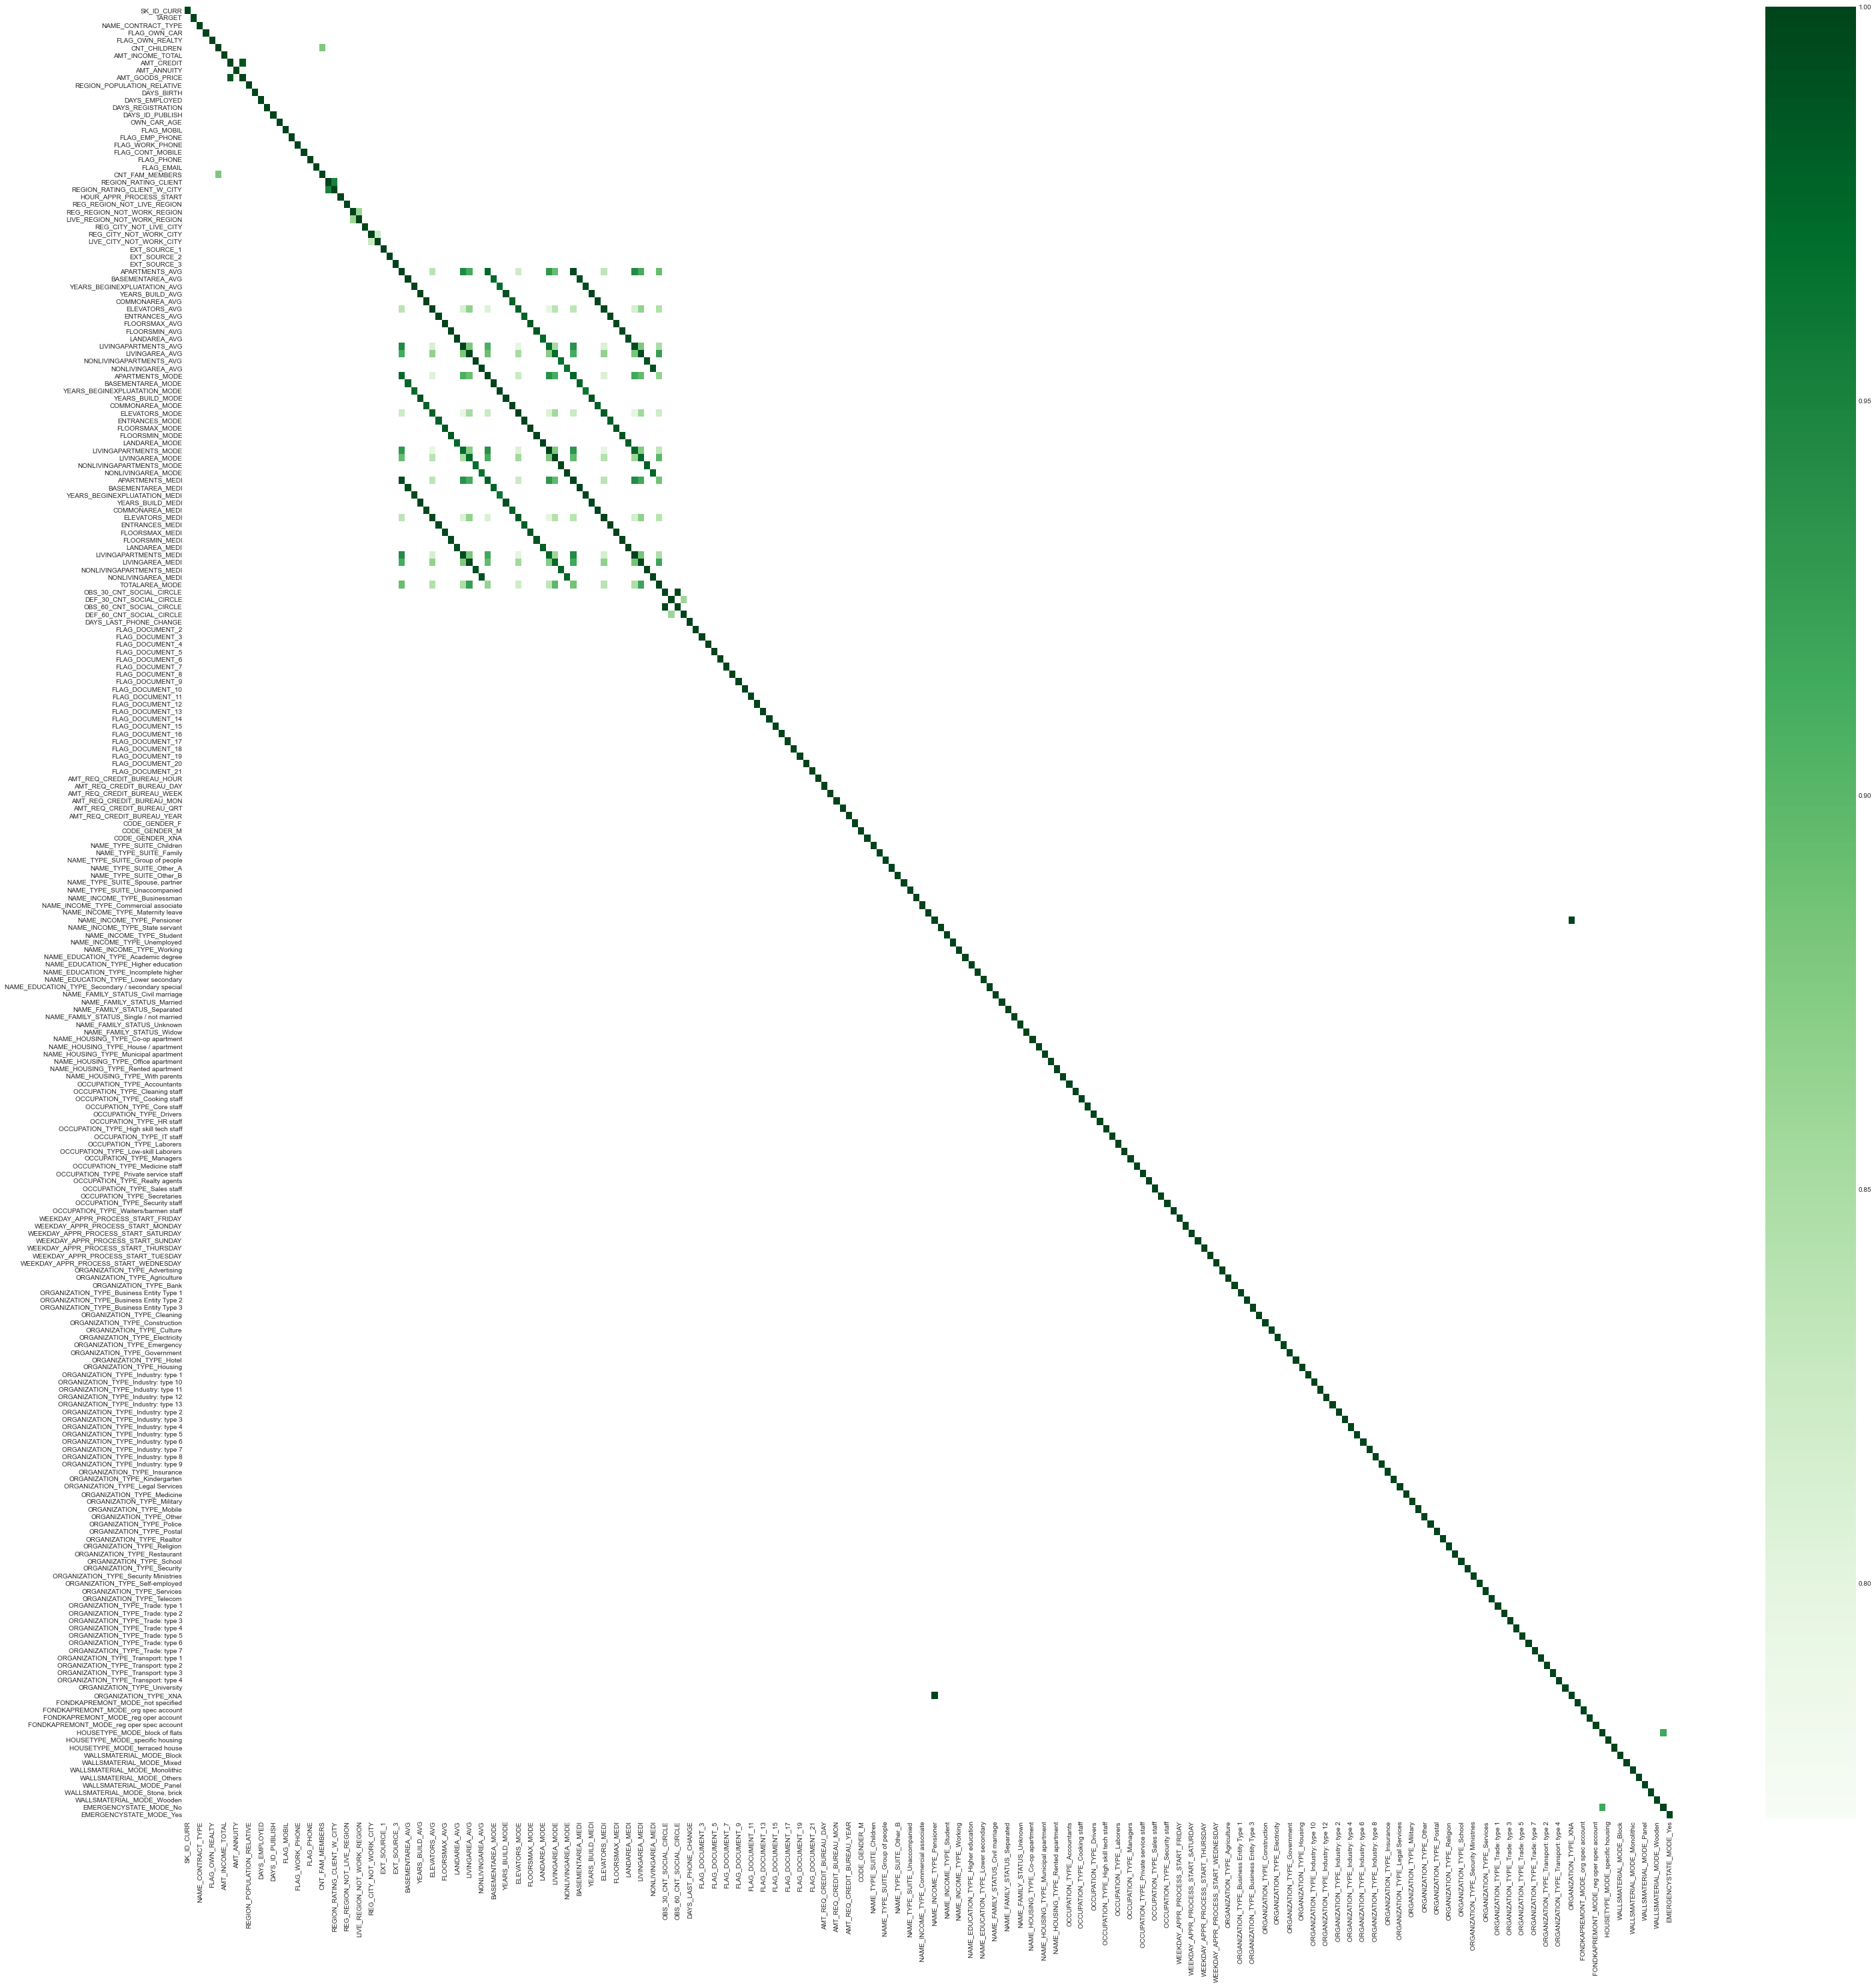

In [24]:
corr= train_df.corr()
kot = corr[corr>=.75]
plt.figure(figsize=(50,50))
sns.heatmap(kot,cmap="Greens");

In [25]:
colls=mx_corr['Feature_1'].unique()

In [26]:
test_df = test_df.drop(test_df[colls],axis=1)
train_df = train_df.drop(train_df[colls], axis = 1)
print('Training Features shape:',train_df.shape)
print('Testing Features shape:',test_df.shape)

Training Features shape: (307511, 197)
Testing Features shape: (48744, 193)


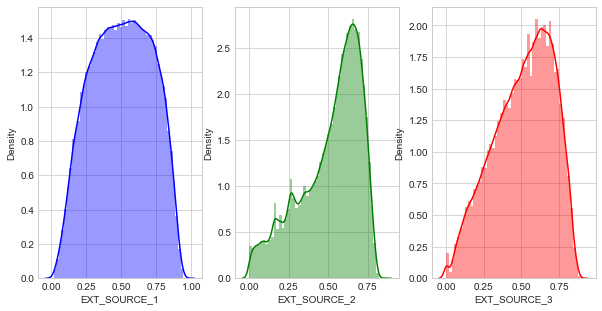

In [27]:
f,ax = plt.subplots(ncols=3,figsize=(10,5))

sns.distplot(train_df.EXT_SOURCE_1,kde=True,color="b",ax=ax[0])
sns.distplot(train_df.EXT_SOURCE_2,kde=True,color="g",ax=ax[1])
sns.distplot(train_df.EXT_SOURCE_3,kde=True,color="r",ax=ax[2]);

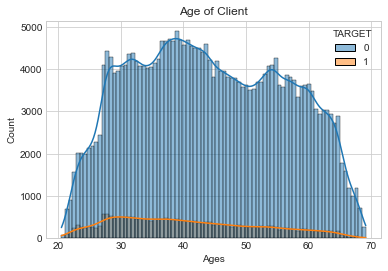

In [28]:
sns.histplot(train_df,x=abs(train_df['DAYS_BIRTH']/365),hue="TARGET",color="g",kde=True);
plt.title('Age of Client')
plt.xlabel('Ages');

In [29]:
target_corr = train_df.corr()['TARGET']
top_features = target_corr[(target_corr>-0.05) & (target_corr<0.05)]
train_df.drop(top_features.index,axis=1,inplace=True)
print('Training Features shape:',train_df.shape)

Training Features shape: (307511, 13)


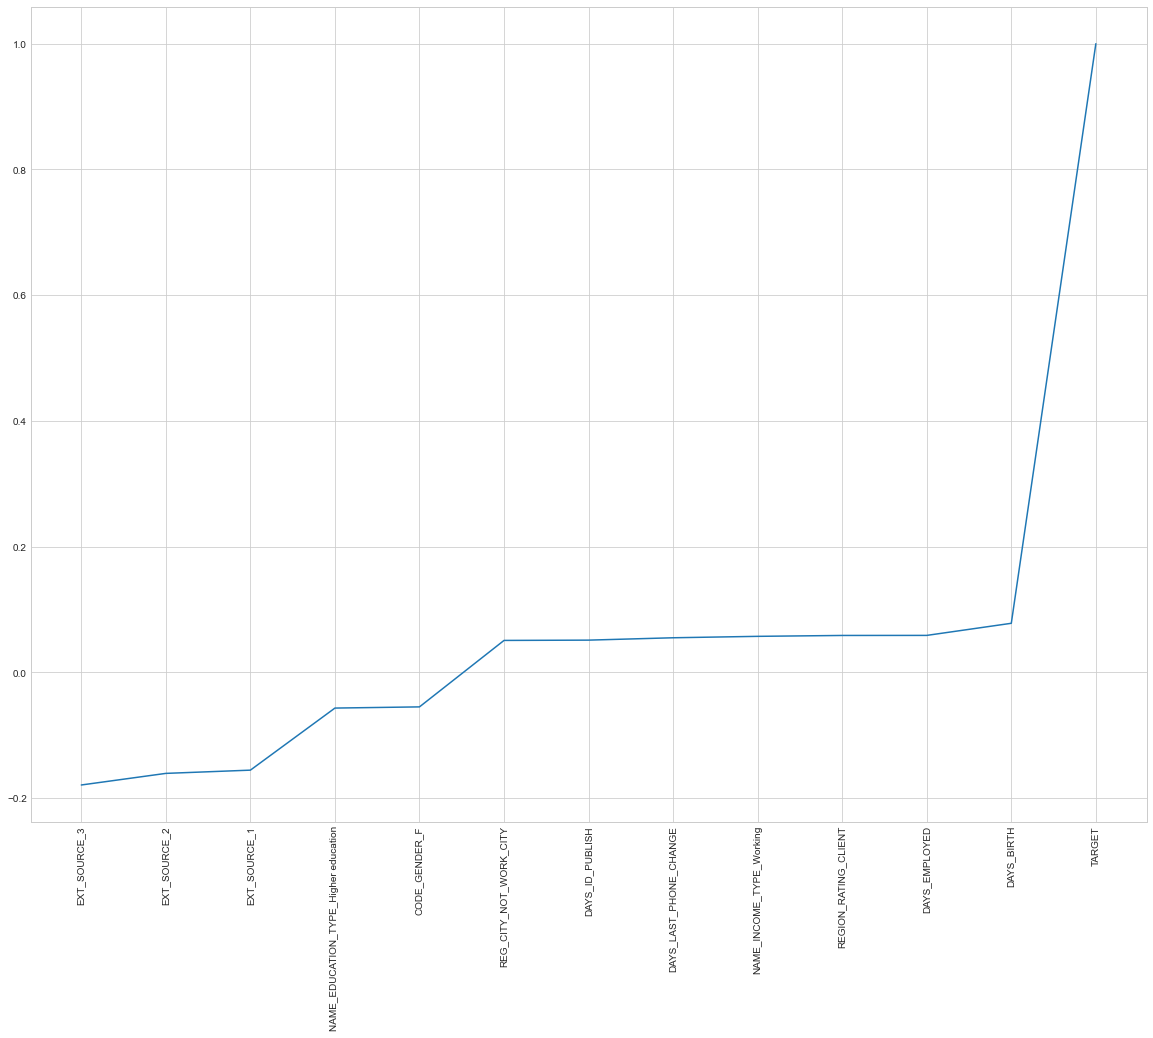

In [30]:
corrs = train_df.corr()['TARGET'].sort_values()
plt.subplots(figsize=(20,15))
plt.xticks(rotation=90)
plt.plot(corrs);

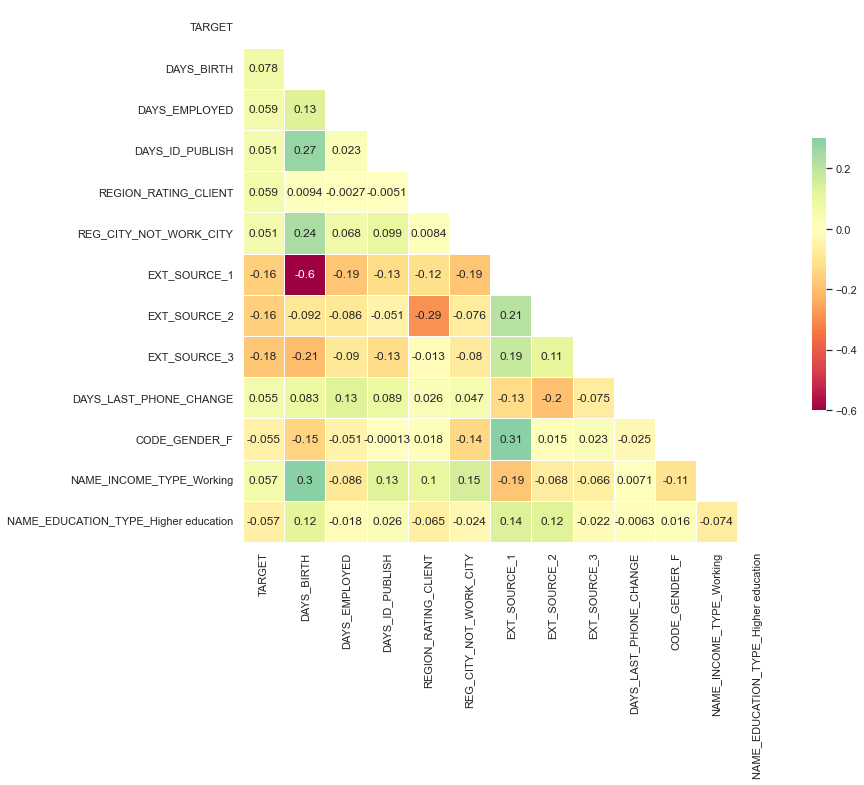

In [31]:
sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(train_df.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap =sns.color_palette("Spectral", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(train_df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True);

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   TARGET                                307511 non-null  int64  
 1   DAYS_BIRTH                            307511 non-null  int64  
 2   DAYS_EMPLOYED                         307511 non-null  int64  
 3   DAYS_ID_PUBLISH                       307511 non-null  int64  
 4   REGION_RATING_CLIENT                  307511 non-null  int64  
 5   REG_CITY_NOT_WORK_CITY                307511 non-null  int64  
 6   EXT_SOURCE_1                          134133 non-null  float64
 7   EXT_SOURCE_2                          306851 non-null  float64
 8   EXT_SOURCE_3                          246546 non-null  float64
 9   DAYS_LAST_PHONE_CHANGE                307510 non-null  float64
 10  CODE_GENDER_F                         307511 non-null  uint8  
 11  

In [33]:
train_df=train_df.drop(['EXT_SOURCE_1'], axis=1)

In [34]:
nan_cols=list(train_df.isnull().columns)
nan_cols

['TARGET',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'REG_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'CODE_GENDER_F',
 'NAME_INCOME_TYPE_Working',
 'NAME_EDUCATION_TYPE_Higher education']

In [35]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy='mean')
imp.fit(train_df[nan_cols])
train_df[nan_cols] = imp.transform(train_df[nan_cols])

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   TARGET                                307511 non-null  float64
 1   DAYS_BIRTH                            307511 non-null  float64
 2   DAYS_EMPLOYED                         307511 non-null  float64
 3   DAYS_ID_PUBLISH                       307511 non-null  float64
 4   REGION_RATING_CLIENT                  307511 non-null  float64
 5   REG_CITY_NOT_WORK_CITY                307511 non-null  float64
 6   EXT_SOURCE_2                          307511 non-null  float64
 7   EXT_SOURCE_3                          307511 non-null  float64
 8   DAYS_LAST_PHONE_CHANGE                307511 non-null  float64
 9   CODE_GENDER_F                         307511 non-null  float64
 10  NAME_INCOME_TYPE_Working              307511 non-null  float64
 11  

In [37]:
train_df.describe()

,TARGET,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,CODE_GENDER_F,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,-16036.995067,-2173.274982,-2994.202373,2.052463,0.230454,5.143927e-01,0.510853,-962.858788,0.658344,0.516320,0.243448
std,0.272419,4363.988632,2164.676336,1509.450419,0.509034,0.421124,1.908550e-01,0.174464,826.807143,0.474266,0.499734,0.429164
min,0.000000,-25229.000000,-17912.000000,-7197.000000,1.000000,0.000000,8.173617e-08,0.000527,-4292.000000,0.000000,0.000000,0.000000
25%,0.000000,-19682.000000,-2760.000000,-4299.000000,2.000000,0.000000,3.929737e-01,0.417100,-1570.000000,0.000000,0.000000,0.000000
50%,0.000000,-15750.000000,-1213.000000,-3254.000000,2.000000,0.000000,5.654672e-01,0.510853,-757.000000,1.000000,1.000000,0.000000
75%,0.000000,-12413.000000,-933.000000,-1720.000000,2.000000,0.000000,6.634218e-01,0.636376,-274.000000,1.000000,1.000000,0.000000
max,1.000000,-7489.000000,0.000000,0.000000,3.000000,1.000000,8.549997e-01,0.896010,0.000000,1.000000,1.000000,1.000000


In [38]:
amount=pd.read_csv('/Users/riina//Downloads/P7/application_train.csv')
amount=amount[['SK_ID_CURR','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY']]
df2 =train_df.join(amount)

In [39]:
df2['Client']=df2['SK_ID_CURR']
del df2['SK_ID_CURR']
df3=df2.copy()

In [40]:
df3['Working']=df3['NAME_INCOME_TYPE_Working']
df3['Higher_Education']=df3['NAME_EDUCATION_TYPE_Higher education']
df3['DAYS_LAST_PHONE_CHANGE']=df3['DAYS_LAST_PHONE_CHANGE']/-1
df3['DAYS_EMPLOYED']=df3['DAYS_EMPLOYED']/-1
df3['DAYS_ID_PUBLISH']=df3['DAYS_ID_PUBLISH']/-1
df3['AGE']=df3['DAYS_BIRTH']/-365

In [41]:
del df3['NAME_EDUCATION_TYPE_Higher education']
del df3['NAME_INCOME_TYPE_Working']
del df3['DAYS_BIRTH']

In [42]:
nan_cols2=list(df3.isnull().columns)
nan_cols2
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy='mean')
imp.fit(df3[nan_cols2])
df3[nan_cols2] = imp.transform(df3[nan_cols2])

In [43]:
df3.to_csv('finalcreditdf.csv')
df4=df3.head(10000)
df4.to_csv('creditdf.csv')

In [44]:
df5=df3.head(180000)
df5.to_csv('finalcredit_df.csv')

In [45]:
train_df.to_csv('credit_df.csv')

In [46]:
train_df=df3.drop(['Client'],axis=1)

In [47]:
X ,y = (train_df.drop(['TARGET'],axis=1).values,train_df.TARGET.values)
print('Training Features shape:',X.shape)

Training Features shape: (307511, 14)


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)
print('X_train Features shape:',X_train.shape)
print('X_test Features shape:',X_test.shape)
print('y_train Features shape:',y_train.shape)
print('y_test Features shape:',y_test.shape)

X_train Features shape: (206032, 14)
X_test Features shape: (101479, 14)
y_train Features shape: (206032,)
y_test Features shape: (101479,)


In [50]:
def predict(chosed_model,name="Model"):
    mdl = chosed_model
    mdl = mdl.fit(X_train,y_train)
    y_prob = mdl.predict_proba(X_test)[:,1]
    y_pred = mdl.predict(X_test)

    cm= confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.title('Confusion Matrix', size=16)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
    
    print("Performances with {}".format(name))
    auc_test = roc_auc_score(y_test,y_prob)
    print("AUC Performance: ", auc_test)
    recall_test = recall_score(y_test, y_pred, average='weighted')
    print("Recall Performance: ", recall_test)
    precision_test = average_precision_score(y_test, y_pred, average='weighted')
    print("Precision Performance: ", precision_test)
    fbeta_test = fbeta_score(y_test, y_pred,beta=2)
    print("Fbeta Performance: ", fbeta_test)
    print(classification_report(y_test,  y_pred))

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

Performances with DecisionTreeClassifier
AUC Performance:  0.5434403194518399
Recall Performance:  0.8532405719409927
Precision Performance:  0.09160275858120849
Fbeta Performance:  0.16844709857010304
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92     93377
         1.0       0.15      0.17      0.16      8102

    accuracy                           0.85    101479
   macro avg       0.54      0.54      0.54    101479
weighted avg       0.86      0.85      0.86    101479



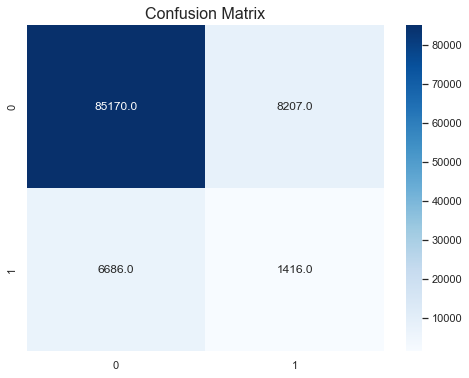

In [52]:
predict((DecisionTreeClassifier(criterion='gini')),'DecisionTreeClassifier')

Performances with RandomForestClassifier
AUC Performance:  0.7214699499730917
Recall Performance:  0.9201608214507435
Precision Performance:  0.0798391785492565
Fbeta Performance:  0.0
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     93377
         1.0       0.00      0.00      0.00      8102

    accuracy                           0.92    101479
   macro avg       0.46      0.50      0.48    101479
weighted avg       0.85      0.92      0.88    101479



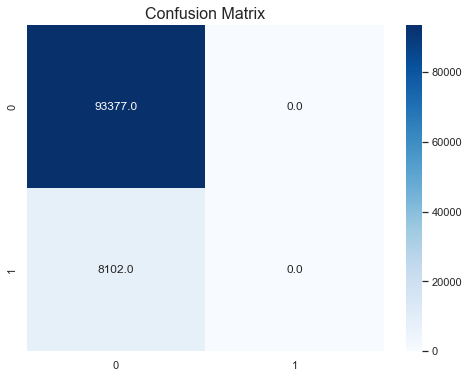

In [53]:
predict((RandomForestClassifier(max_depth=4 , random_state=0)),'RandomForestClassifier')

In [54]:
from sklearn.metrics import accuracy_score

Performances with LogisticRegression
AUC Performance:  0.5909112006322401
Recall Performance:  0.9201608214507435
Precision Performance:  0.0798391785492565
Fbeta Performance:  0.0
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     93377
         1.0       0.00      0.00      0.00      8102

    accuracy                           0.92    101479
   macro avg       0.46      0.50      0.48    101479
weighted avg       0.85      0.92      0.88    101479



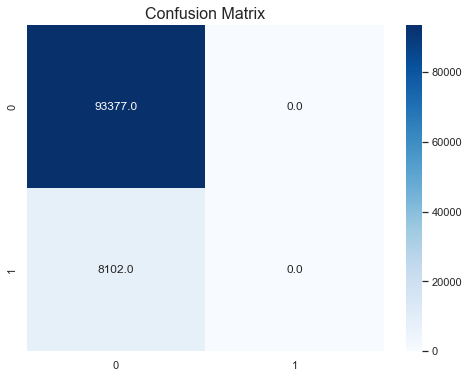

In [55]:
predict((LogisticRegression()),'LogisticRegression')

In [56]:
from sklearn.metrics import mean_squared_error as MSE
import xgboost as xg

[09:12:22] WARNING: /private/var/folders/ym/0dspvgrx5d5c7jglsy03b4w80000gp/T/pip-install-ahi98vrw/xgboost_76efe74a7c674815a43b8115aca5ce2e/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performances with XGBClassifier
AUC Performance:  0.7356044545372058
Recall Performance:  0.9197075256949714
Precision Performance:  0.08755792847605198
Fbeta Performance:  0.026371951219512194
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     93377
         1.0       0.44      0.02      0.04      8102

    accuracy                           0.92    101479
   macro avg       0.68      0.51      0.50    101479
weighted avg       0.88      0.92      0.88    101479



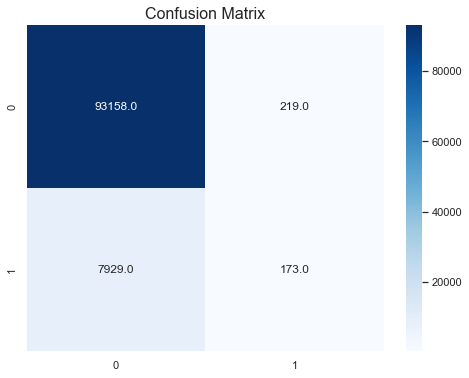

In [57]:
predict((xg.XGBClassifier()),'XGBClassifier')

## Oversampling

## SMOTE 

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 16723
Before OverSampling, counts of label '0': 189309 



In [60]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [61]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (378618, 14)
After OverSampling, the shape of train_y: (378618,) 

After OverSampling, counts of label '1': 189309
After OverSampling, counts of label '0': 189309


In [62]:
def predict(chosed_model,name="Model"):
    mdl = chosed_model
    mdl = mdl.fit(X_train_res, y_train_res)
    y_prob = mdl.predict_proba(X_test)[:,1]
    y_pred = mdl.predict(X_test)

    cm= confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.title('Confusion Matrix', size=16)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
    
    print("Performances with {}".format(name))
    auc_test = roc_auc_score(y_test,y_prob)
    print("AUC Performance: ", auc_test)
    recall_test = recall_score(y_test, y_pred, average='weighted')
    print("Recall Performance: ", recall_test)
    fbeta_test = fbeta_score(y_test, y_pred,beta=2)
    print("Fbeta Performance: ", fbeta_test)
    print(classification_report(y_test,  y_pred))

Performances with DecisionTreeClassifier
AUC Performance:  0.5414950057647545
Recall Performance:  0.8323396958976734
Fbeta Performance:  0.17792114373061188
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91     93377
         1.0       0.13      0.20      0.16      8102

    accuracy                           0.83    101479
   macro avg       0.53      0.54      0.53    101479
weighted avg       0.86      0.83      0.85    101479



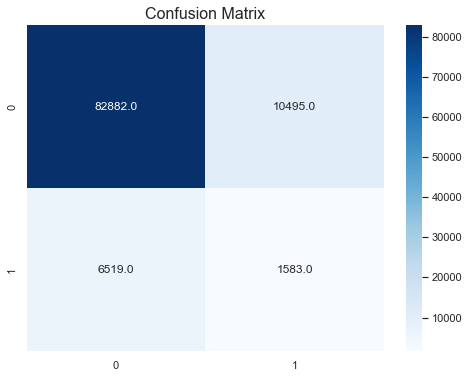

In [63]:
predict((DecisionTreeClassifier(criterion='gini')),'DecisionTreeClassifier')

Performances with RandomForestClassifier
AUC Performance:  0.6761200981329148
Recall Performance:  0.7893554331438032
Fbeta Performance:  0.29279888678443045
              precision    recall  f1-score   support

         0.0       0.94      0.83      0.88     93377
         1.0       0.16      0.37      0.22      8102

    accuracy                           0.79    101479
   macro avg       0.55      0.60      0.55    101479
weighted avg       0.88      0.79      0.83    101479



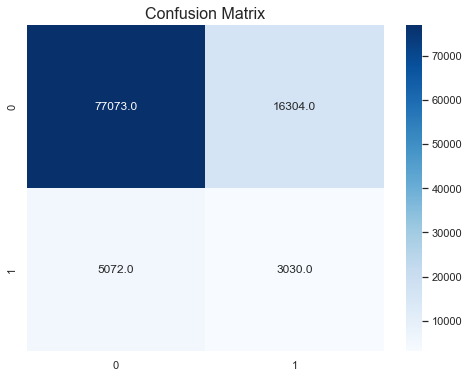

In [64]:
predict((RandomForestClassifier(max_depth=4 , random_state=0)),'RandomForestClassifier')

Performances with LogisticRegression
AUC Performance:  0.5837055423344222
Recall Performance:  0.6325446644133269
Fbeta Performance:  0.27933605410784074
              precision    recall  f1-score   support

         0.0       0.93      0.65      0.76     93377
         1.0       0.10      0.48      0.17      8102

    accuracy                           0.63    101479
   macro avg       0.52      0.56      0.47    101479
weighted avg       0.87      0.63      0.72    101479



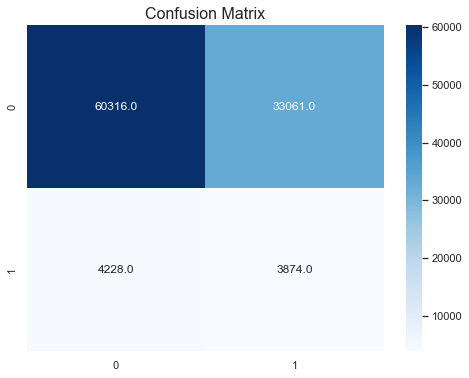

In [65]:
predict((LogisticRegression()),'LogisticRegression')

[09:13:32] WARNING: /private/var/folders/ym/0dspvgrx5d5c7jglsy03b4w80000gp/T/pip-install-ahi98vrw/xgboost_76efe74a7c674815a43b8115aca5ce2e/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performances with XGBClassifier
AUC Performance:  0.7171128855457081
Recall Performance:  0.9141201627923019
Fbeta Performance:  0.08498376385922829
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     93377
         1.0       0.33      0.07      0.12      8102

    accuracy                           0.91    101479
   macro avg       0.63      0.53      0.54    101479
weighted avg       0.88      0.91      0.89    101479



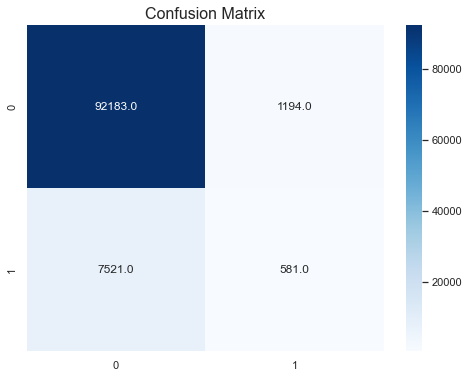

In [66]:
predict((xg.XGBClassifier()),'XGBClassifier')

## Undersampling

## Nearmiss

In [67]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss

nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train)
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 16723
Before Undersampling, counts of label '0': 189309 

After Undersampling, the shape of train_X: (33446, 14)
After Undersampling, the shape of train_y: (33446,) 

After Undersampling, counts of label '1': 16723
After Undersampling, counts of label '0': 16723


In [68]:
def predict(chosed_model,name="Model"):
    mdl = chosed_model
    mdl = mdl.fit(X_train_miss, y_train_miss)
    y_prob = mdl.predict_proba(X_test)[:,1]
    y_pred = mdl.predict(X_test)

    cm= confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.title('Confusion Matrix', size=16)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
     
    print("Performances with {}".format(name))
    auc_test = roc_auc_score(y_test,y_prob)
    print("AUC Performance: ", auc_test)
    recall_test = recall_score(y_test, y_pred, average='weighted')
    print("Recall Performance: ", recall_test)
    fbeta_test = fbeta_score(y_test, y_pred,beta=2)
    print("Fbeta Performance: ", fbeta_test)
    print(classification_report(y_test,  y_pred))

Performances with DecisionTreeClassifier
AUC Performance:  0.5120754500987994
Recall Performance:  0.3259886281890835
Fbeta Performance:  0.28410937948178605
              precision    recall  f1-score   support

         0.0       0.93      0.29      0.44     93377
         1.0       0.08      0.73      0.15      8102

    accuracy                           0.33    101479
   macro avg       0.50      0.51      0.30    101479
weighted avg       0.86      0.33      0.42    101479



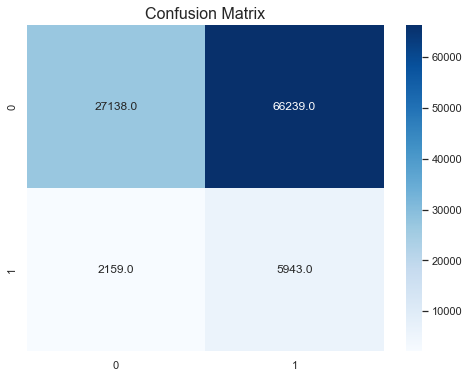

In [69]:
predict((DecisionTreeClassifier(criterion='gini')),'DecisionTreeClassifier')

Performances with RandomForestClassifier
AUC Performance:  0.5347971200493133
Recall Performance:  0.33887799446190836
Fbeta Performance:  0.30711351683365967
              precision    recall  f1-score   support

         0.0       0.94      0.30      0.45     93377
         1.0       0.09      0.79      0.16      8102

    accuracy                           0.34    101479
   macro avg       0.52      0.54      0.31    101479
weighted avg       0.87      0.34      0.43    101479



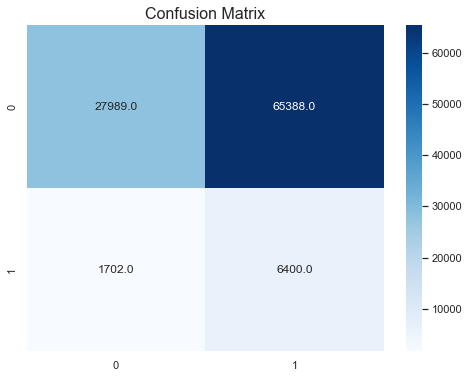

In [70]:
predict((RandomForestClassifier(max_depth=4 , random_state=0)),'RandomForestClassifier')

Performances with LogisticRegression
AUC Performance:  0.5085318213532042
Recall Performance:  0.3682929473092955
Fbeta Performance:  0.2829630372636541
              precision    recall  f1-score   support

         0.0       0.93      0.34      0.50     93377
         1.0       0.08      0.70      0.15      8102

    accuracy                           0.37    101479
   macro avg       0.51      0.52      0.32    101479
weighted avg       0.86      0.37      0.47    101479



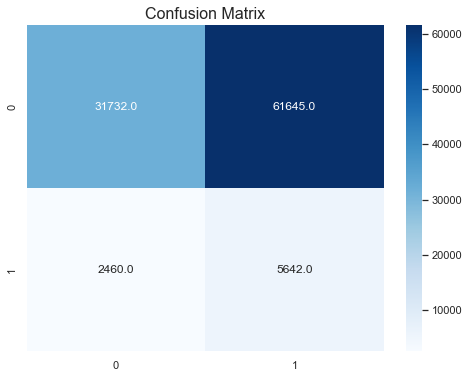

In [71]:
predict((LogisticRegression()),'LogisticRegression')

[09:14:55] WARNING: /private/var/folders/ym/0dspvgrx5d5c7jglsy03b4w80000gp/T/pip-install-ahi98vrw/xgboost_76efe74a7c674815a43b8115aca5ce2e/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performances with XGBClassifier
AUC Performance:  0.49275945724906334
Recall Performance:  0.23352614826712917
Fbeta Performance:  0.29236983919658843
              precision    recall  f1-score   support

         0.0       0.93      0.18      0.30     93377
         1.0       0.08      0.83      0.15      8102

    accuracy                           0.23    101479
   macro avg       0.50      0.51      0.23    101479
weighted avg       0.86      0.23      0.29    101479



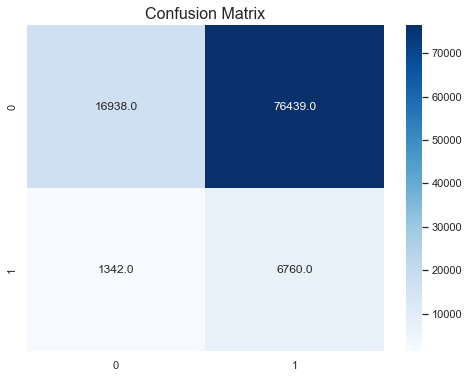

In [72]:
predict((xg.XGBClassifier()),'XGBClassifier')

## Weights

In [73]:
X ,y = (train_df.drop(['TARGET'],axis=1).values,train_df.TARGET.values)
print('Training Features shape:',X.shape)

Training Features shape: (307511, 14)


In [74]:
X_train_w, X_test, y_train_w, y_test = train_test_split(X,y,test_size=0.33,random_state=0)
print('X_train Features shape:',X_train.shape)
print('X_test Features shape:',X_test.shape)
print('y_train Features shape:',y_train.shape)
print('y_test Features shape:',y_test.shape)

X_train Features shape: (206032, 14)
X_test Features shape: (101479, 14)
y_train Features shape: (206032,)
y_test Features shape: (101479,)


In [75]:
def predict(chosed_model,name="Model"):
    mdl = chosed_model
    mdl = mdl.fit(X_train_w, y_train_w)
    y_prob = mdl.predict_proba(X_test)[:,1]
    y_pred = mdl.predict(X_test)

    cm= confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.title('Confusion Matrix', size=16)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
     
    print("Performances with {}".format(name))
    auc_test = roc_auc_score(y_test,y_prob)
    print("AUC Performance: ", auc_test)
    recall_test = recall_score(y_test, y_pred, average='weighted')
    print("Recall Performance: ", recall_test)
    fbeta_test = fbeta_score(y_test, y_pred,beta=2)
    print("Fbeta Performance: ", fbeta_test)
    print(classification_report(y_test,  y_pred))

Performances with DecisionTreeClassifier
AUC Performance:  0.5324243672235934
Recall Performance:  0.8608677657446369
Fbeta Performance:  0.1408433409464869
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92     93377
         1.0       0.14      0.14      0.14      8102

    accuracy                           0.86    101479
   macro avg       0.53      0.53      0.53    101479
weighted avg       0.86      0.86      0.86    101479



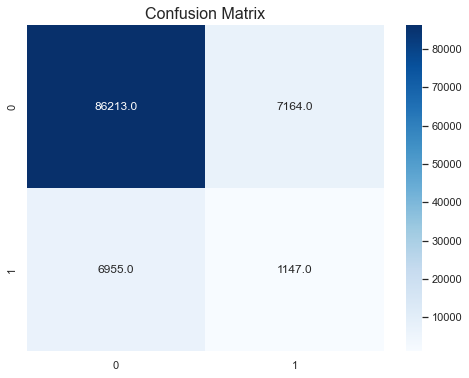

In [76]:
predict((DecisionTreeClassifier(criterion='gini',class_weight='balanced')),'DecisionTreeClassifier')

Performances with RandomForestClassifier
AUC Performance:  0.7237036170441191
Recall Performance:  0.6626494151499325
Fbeta Performance:  0.39218227906440833
              precision    recall  f1-score   support

         0.0       0.96      0.66      0.78     93377
         1.0       0.15      0.67      0.24      8102

    accuracy                           0.66    101479
   macro avg       0.55      0.67      0.51    101479
weighted avg       0.89      0.66      0.74    101479



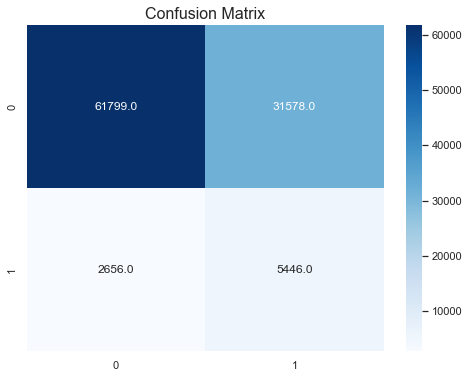

In [77]:
predict((RandomForestClassifier(max_depth=4 , random_state=0,class_weight='balanced')),'RandomForestClassifier')

Performances with LogisticRegression
AUC Performance:  0.5877125494732631
Recall Performance:  0.6619891800273948
Fbeta Performance:  0.27440645269089975
              precision    recall  f1-score   support

         0.0       0.93      0.68      0.79     93377
         1.0       0.11      0.45      0.17      8102

    accuracy                           0.66    101479
   macro avg       0.52      0.56      0.48    101479
weighted avg       0.87      0.66      0.74    101479



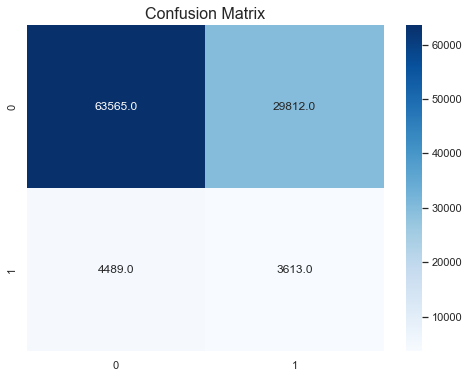

In [78]:
predict((LogisticRegression(class_weight='balanced')),'LogisticRegression')

[09:15:20] WARNING: /private/var/folders/ym/0dspvgrx5d5c7jglsy03b4w80000gp/T/pip-install-ahi98vrw/xgboost_76efe74a7c674815a43b8115aca5ce2e/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:15:21] WARNING: /private/var/folders/ym/0dspvgrx5d5c7jglsy03b4w80000gp/T/pip-install-ahi98vrw/xgboost_76efe74a7c674815a43b8115aca5ce2e/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performances with XGBClassifier
AUC Performance:  0.7356044545372058


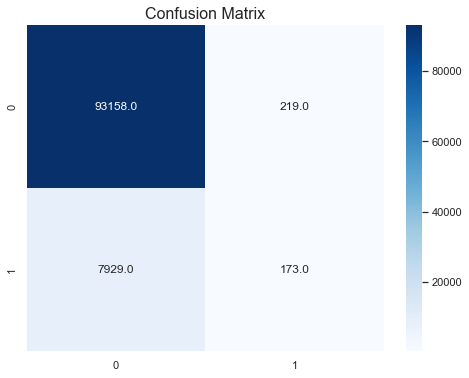

In [79]:
predict((xg.XGBClassifier(class_weight='balanced')),'XGBClassifier')

## Different weights

In [80]:
def predict(chosed_model,name="Model"):
    mdl = chosed_model
    mdl = mdl.fit(X_train_w, y_train_w)
    y_prob = mdl.predict_proba(X_test)[:,1]
    y_pred = mdl.predict(X_test)

    cm= confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.title('Confusion Matrix', size=16)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
     
    print("Performances with {}".format(name))
    auc_test = roc_auc_score(y_test,y_prob)
    print("AUC Performance: ", auc_test)
    recall_test = recall_score(y_test, y_pred, average='weighted')
    print("Recall Performance: ", recall_test)
    fbeta_test = fbeta_score(y_test, y_pred,beta=2)
    print("Fbeta Performance: ", fbeta_test)
    print(classification_report(y_test,  y_pred))

Performances with DecisionTreeClassifier
AUC Performance:  0.5365418905939959
Recall Performance:  0.8603553444555031
Fbeta Performance:  0.14965670584210913
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92     93377
         1.0       0.14      0.15      0.15      8102

    accuracy                           0.86    101479
   macro avg       0.53      0.54      0.54    101479
weighted avg       0.86      0.86      0.86    101479



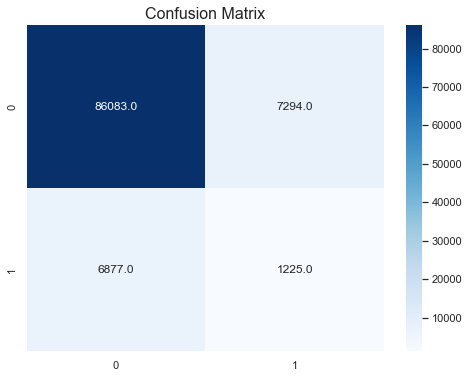

In [81]:
predict((DecisionTreeClassifier(criterion='gini',class_weight={0:1, 1:8})),'DecisionTreeClassifier')

Performances with RandomForestClassifier
AUC Performance:  0.7237209366731366
Recall Performance:  0.6810670187920653
Fbeta Performance:  0.3919861923254326
              precision    recall  f1-score   support

         0.0       0.96      0.68      0.80     93377
         1.0       0.15      0.65      0.25      8102

    accuracy                           0.68    101479
   macro avg       0.55      0.67      0.52    101479
weighted avg       0.89      0.68      0.75    101479



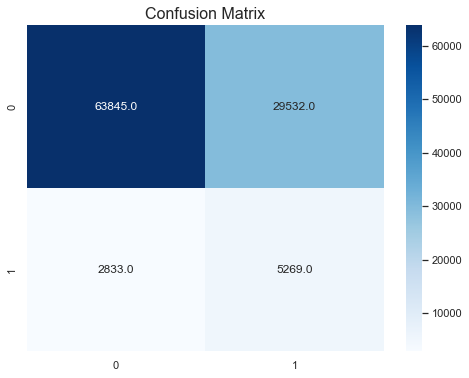

In [82]:
predict((RandomForestClassifier(max_depth=4 , random_state=0,class_weight={0:1, 1:11})),'RandomForestClassifier')

Performances with LogisticRegression
AUC Performance:  0.5809508555374622
Recall Performance:  0.5212999733935101
Fbeta Performance:  0.3001400492587048
              precision    recall  f1-score   support

         0.0       0.94      0.51      0.66     93377
         1.0       0.10      0.61      0.17      8102

    accuracy                           0.52    101479
   macro avg       0.52      0.56      0.42    101479
weighted avg       0.87      0.52      0.62    101479



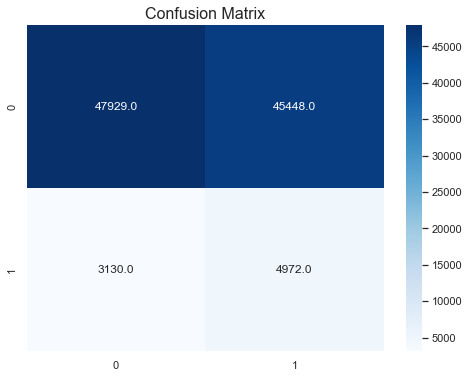

In [83]:
predict((LogisticRegression(class_weight={0:0.08, 1:1})),'LogisticRegression')

In [84]:
X_train_w, X_test, y_train_w, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)
#
# Create pipeline with LogisticRegression and class_weight as {0:3, 1:1}
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=1, class_weight={0:1, 1:3}))
#
# Create a randomized search for finding most appropriate model
from scipy.stats import expon
param_distributions = [{'logisticregression__C': expon(scale=100)}]
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(estimator=pipeline, param_distributions = param_distributions, cv = 10, scoring = 'accuracy', refit = True, n_jobs = 1,random_state=1)
#
# Fit the model
#
rs.fit(X_train, y_train)
#
# Find the best score, params and accuracy on the test dataset
#
print('Best Score:', rs.best_score_, '\nBest Params:', rs.best_params_)
print('Test Accuracy: %0.3f' % rs.score(X_test, y_test))

Best Score: 0.9054418621410522 
Best Params: {'logisticregression__C': 0.011438135864308592}
Test Accuracy: 0.905


[09:16:30] WARNING: /private/var/folders/ym/0dspvgrx5d5c7jglsy03b4w80000gp/T/pip-install-ahi98vrw/xgboost_76efe74a7c674815a43b8115aca5ce2e/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:16:31] WARNING: /private/var/folders/ym/0dspvgrx5d5c7jglsy03b4w80000gp/T/pip-install-ahi98vrw/xgboost_76efe74a7c674815a43b8115aca5ce2e/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performances with XGBClassifier
AUC Performance:  0.736128440825314
R

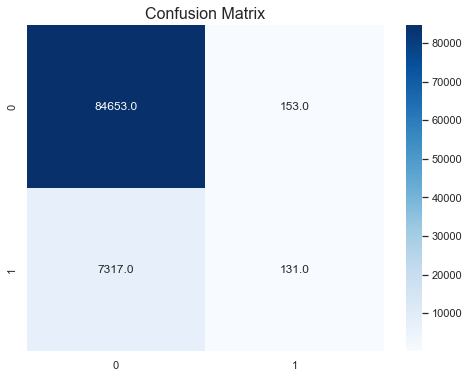

In [85]:
predict((xg.XGBClassifier(class_weight={0:1, 1:50})),'XGBClassifier')

In [86]:
def predict(chosed_model,name="Model"):
    mdl = chosed_model
    mdl = mdl.fit(X_train_w, y_train_w)
    y_prob = mdl.predict_proba(X_test)[:,1]
    y_pred = mdl.predict(X_test)

    cm= confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.title('Confusion Matrix', size=16)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
     
    print("Performances with {}".format(name))
    auc_test = roc_auc_score(y_test,y_prob)
    print("AUC Performance: ", auc_test)
    recall_test = recall_score(y_test, y_pred, average='weighted')
    print("Recall Performance: ", recall_test)
    fbeta_test = fbeta_score(y_test, y_pred,beta=2)
    print("Fbeta Performance: ", fbeta_test)
    print(classification_report(y_test,  y_pred))

## SHAP

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap

In [88]:
X,y = (train_df.drop(['TARGET'],axis=1).values,df3.TARGET.values)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)
rf = RandomForestClassifier(max_depth=4 , random_state=0,class_weight='balanced')
model=rf.fit(X_train, y_train)

y_pred2 = rf.predict(X)

In [89]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [90]:
np.shape(X)

(307511, 14)

In [91]:
train_df.columns

Index(['TARGET', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT',
       'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER_F', 'AMT_CREDIT',
       'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'Working', 'Higher_Education',
       'AGE'],
      dtype='object')

In [92]:
lcol=['Employment','Id publish','Region','Commuting','Source 2','Source 3','Phone','Gender','Credit','Income','Annuity','Working','Education','Age']

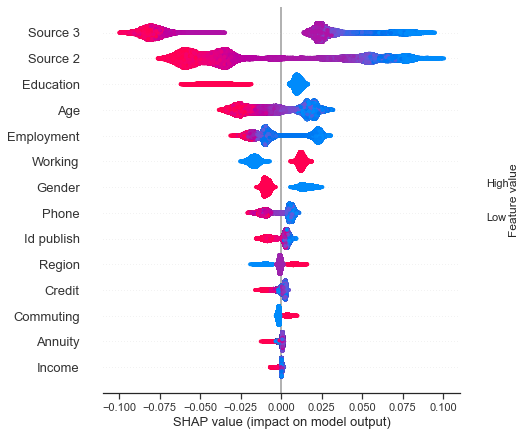

In [93]:
shap.initjs()
shap.summary_plot(shap_values = shap_values[1],features = X, feature_names=lcol)

In [94]:
X_idx = 12

shap_value_single = explainer.shap_values(X = X[X_idx:X_idx+1,:])
shap.force_plot(base_value = explainer.expected_value[0],
                shap_values = shap_value_single[0],
                features = X[X_idx:X_idx+1,:],feature_names=lcol)